# Stock Valuation

## Part 1: Performance Measurement

### Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors, all expressed as a percentage. These observations cover the ten-year period from Jan 2004 through Dec 2013.

### Using excess returns for the ten industry portfolios, calculate the following performance metrics:

### Sharpe ratio
### Sortino ratio (using risk-free rate as target)
### Treynor ratio (using CAPM beta)
### Jensen's alpha
### Three-factor alpha
### The sample semi-variance can be estimated as:
### 1120∑t=1120min{Rit−Rft,0}2
 ### where Ri is return on industry portfolio and Rf is risk-free rate

### Create a table showing the performance metrics for the ten industry portfolios. Also plot your results as a bar chart for each performance metric. Briefly explain the economic significance of each performance metric.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

### import data

In [2]:
rf = pd.read_csv('Risk_Factors.csv',index_col=0,parse_dates=True)
df = pd.read_csv('Industry_Portfolios.csv',index_col=0,parse_dates=True)
mk = pd.read_csv('Market_Portfolio.csv',index_col=0,parse_dates=True)

In [3]:
rf 

,Rf,Rm-Rf,SMB,HML
Date,,,,
200401,0.07,2.15,2.67,1.55
200402,0.06,1.40,-1.17,0.45
200403,0.09,-1.32,1.84,0.07
200404,0.08,-1.83,-2.59,-1.67
200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46
201309,0.00,3.76,2.85,-1.59
201310,0.00,4.17,-1.56,1.31


In [4]:
stock_names  = df.columns

#### calculate sharpe ratio
#### calculate sortino ratio, rf as benchmark
#### calculate treynor ratio
#### calculate jensen's alpha
#### calculate three factor alpha

In [5]:
sharpe_ratio = []
sortino_ratio =[]
treynor_ratio = []
jensens_alpha =[]
three_factor_alpha = []

In [6]:
## sharp ratio
for i in stock_names:
    ex_return = df[i]-rf['Rf']
    mean_ex_return = ex_return.mean()
    std__ex_return = ex_return.std()
    sharpe_r = mean_ex_return/std__ex_return
    sharpe_ratio.append(sharpe_r)

#### Before we calculate treynor ratio, we have to get beta again


In [7]:
import statsmodels.api as sm
mk_add_constant = sm.add_constant(mk)
stock_names  = df.columns
rf0 = 0.13
result_pd = []
for stock in stock_names: 
    model = sm.OLS(endog = df[stock]-rf0, exog = mk_add_constant-rf0) 
    result = model.fit() 
    result_p = result.params
    result_pd.append(result_p)

resultp = pd.DataFrame(result_pd)
resultp = resultp.rename(columns = {'const': 'alpha', 'Market': 'Beta'}, inplace = False)
Name = ["NoDur",'Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth','Utils','Other']
Name_table = pd.DataFrame(data = Name,columns = ['Company'])
table=pd.concat([Name_table,resultp],axis=1)
table = table.set_index('Company')
table2 = table['Beta'].T
table2

Company
NoDur    0.652647
Durbl    1.648536
Manuf    1.169846
Enrgy    0.969850
HiTec    1.132969
Telcm    0.900729
Shops    0.826492
Hlth     0.673036
Utils    0.538086
Other    1.207309
Name: Beta, dtype: float64

In [8]:
## treynor ratio
for i in stock_names:
    ex_return = df[i]-rf['Rf']
    mean_ex_return = ex_return.mean()
    treynor_r = mean_ex_return/table2[i]
    treynor_ratio.append(treynor_r)

In [9]:
## jensen's alpha
for i in stock_names:
    ex_return = df[i]-rf['Rf']
    mean_ex_return = ex_return.mean()
    ex_mk_return = mk['Market']-rf['Rf']
    mean_ex_mk_return = ex_mk_return .mean()
    jensens_a = mean_ex_return - (table2[i]*mean_ex_mk_return)
    jensens_alpha.append(jensens_a)

In [10]:
## three_factor_alpha
from sklearn import linear_model
three_factor_alpha = []
for i in stock_names:
    ex_return = df[i]-rf['Rf']
    x=rf[['Rm-Rf','SMB','HML']]
    y = ex_return
    ff_model=linear_model.LinearRegression().fit(x,y)
    three_factor_a=ff_model.intercept_
    three_factor_alpha.append(three_factor_a)

In [11]:
## sortino_ratio
target = 0
for i in stock_names:
    df['downside_returns'] = 0
    df.loc[df[i]-rf['Rf'] < target, 'downside_returns'] = df[i]**2
    ex_return = df[i]-rf['Rf']
    mean_ex_return = ex_return.mean()
    down_stdev = np.sqrt(df['downside_returns'].mean())
    sortino_r = (mean_ex_return)/down_stdev
    sortino_ratio.append(sortino_r )

In [12]:
 sortino_ratio

[0.3572393133835036,
 0.1129599018861173,
 0.24371738134998921,
 0.27731302937127356,
 0.17332761025238758,
 0.24915366019679566,
 0.29967091987031363,
 0.276815482247816,
 0.2950902896341427,
 0.08821760847968677]

In [13]:
## Sorting data
sharpe_ratio = pd.DataFrame(sharpe_ratio)
sharpe_ratio = sharpe_ratio.rename(columns = {0: 'sharpe_ratio'}, inplace = False)
sortino_ratio = pd.DataFrame(sortino_ratio)
sortino_ratio = sortino_ratio.rename(columns = {0: 'sortino_ratio'}, inplace = False)
treynor_ratio = pd.DataFrame(treynor_ratio)
treynor_ratio = treynor_ratio.rename(columns = {0: 'treynor_ratio'}, inplace = False)
jensens_alpha = pd.DataFrame(jensens_alpha)
jensens_alpha= jensens_alpha.rename(columns = {0: 'jensens_alpha'}, inplace = False)
three_factor_alpha= pd.DataFrame(three_factor_alpha)
three_factor_alpha= three_factor_alpha.rename(columns = {0: 'three_factor_alpha'}, inplace = False)

### Create a table showing the performance metrics for the ten industry portfolios


In [14]:
## Create a table showing the performance metrics for the ten industry portfolios
Name = ["NoDur",'Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth','Utils','Other']
Name_table = pd.DataFrame(data = Name,columns = ['Company'])
table_sum=pd.concat([Name_table,sharpe_ratio, sortino_ratio,treynor_ratio,jensens_alpha,three_factor_alpha],axis=1)
table_sum = table_sum.set_index('Company')

In [15]:
table_sum

,sharpe_ratio,sortino_ratio,treynor_ratio,jensens_alpha,three_factor_alpha
Company,,,,,
NoDur,0.231099,0.357239,1.188365,0.370398,0.386704
Durbl,0.072356,0.112960,0.367650,-0.417383,-0.474342
Manuf,0.166616,0.243717,0.757008,0.159304,0.153285
Enrgy,0.181708,0.277313,1.138234,0.501801,0.523007
HiTec,0.118552,0.173328,0.564005,-0.064385,-0.065979
Telcm,0.169064,0.249154,0.837285,0.194964,0.200724
Shops,0.191753,0.299671,0.954738,0.275969,0.255941
Hlth,0.172529,0.276815,0.975555,0.238740,0.257472
Utils,0.210948,0.295090,1.449427,0.445855,0.474411


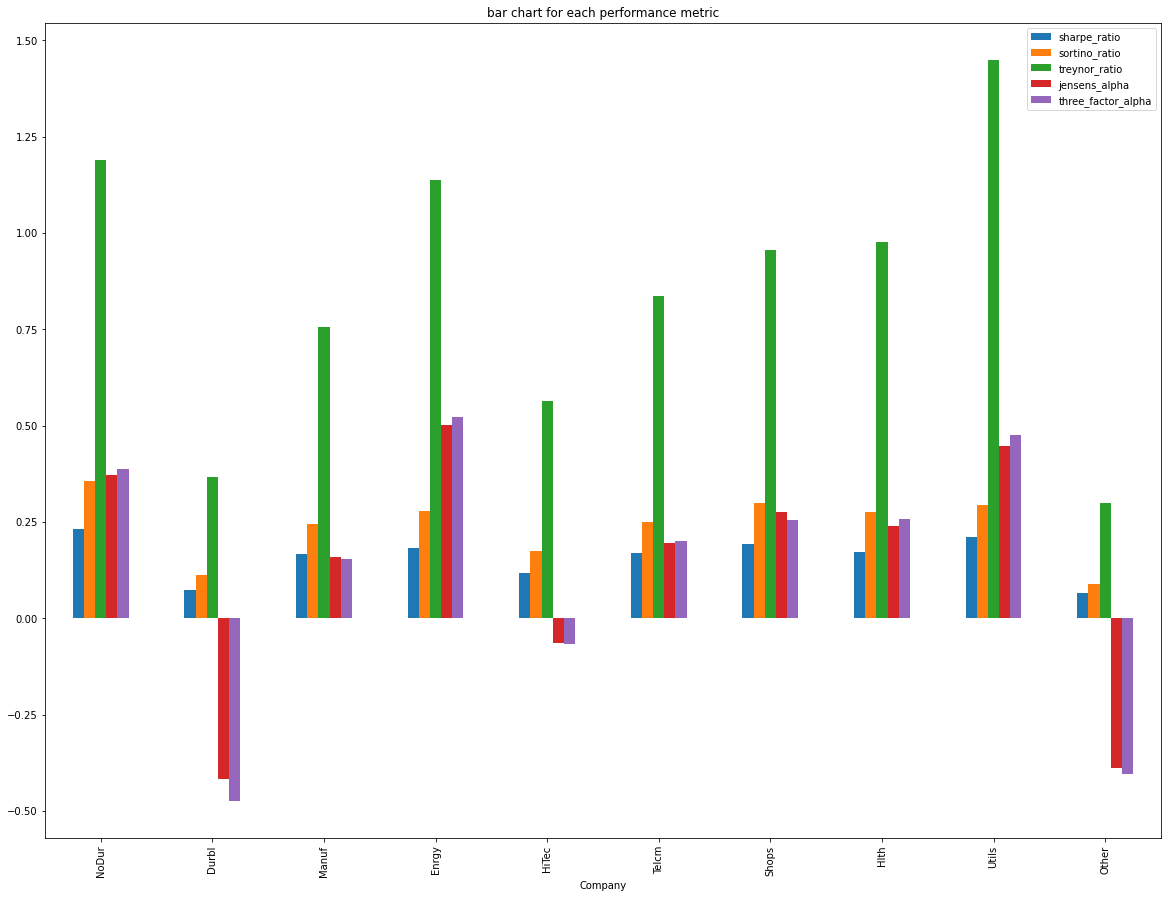

In [28]:
table_sum.plot(kind='bar',figsize=(20,15),title='bar chart for each performance metric')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc14aadb100>,
      dtype=object)

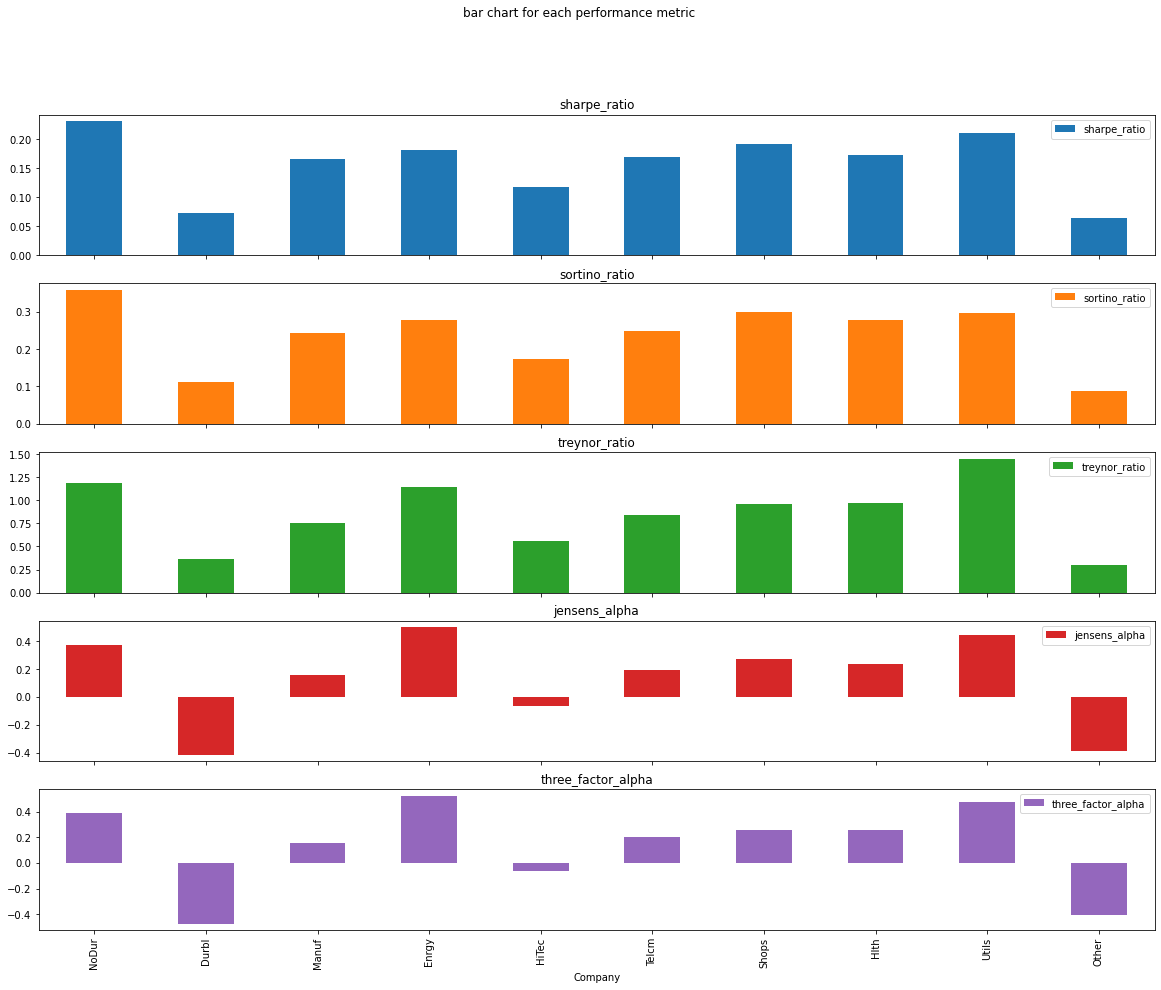

In [29]:
table_sum.plot(subplots=True,kind='bar',figsize=(20,15),title='bar chart for each performance metric')

## Briefly explain the economic significance of each performance metric.

## •	Economic Significance of Each Metric

### i. Sharpe Ratio

### Sharpe Ratio represents risk premium per unit of standard deviation or total risk.

### ii. Sortino Ratio

### Sortino Ratio represents premium over target mean return, per unit of below-target semi-deviation

### iii. Treynor ratio

### it is a ratio evaluating how much of excess return was generated for each unit of risk taken by the portfolio

### iv. Jensen’s Alpha

### It is the slope coefficient from market model regression using excess returns.

### v. Three-factor Alpha

### It is the slope coefficient from Fama-French three-factor model regression using excess returns.


## Part 2: Minimum-Variance Frontier Revisited

### Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. 

### Without short sales, portfolio weights will be limited to the range [0, 1]. Randomly draw each element of w, the vector of portfolio weights, from the uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one.

### Use the normalized w to calculate the mean return and standard deviation of return. Repeat this process until you have at least 105 observations. Plot the points with mean return on the vertical axis and standard deviation of return on the horizontal axis to show the minimum-variance frontier.



#### Please submit your results and programming code, as (uncompressed) MS Word or Adobe PDF, to the submission folder for Homework 3 before 7 pm on Wednesday, 4 November.

In [30]:
df = pd.read_csv('Industry_Portfolios.csv',index_col=0,parse_dates=True)

In [31]:
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [32]:
covariance_matrix = df.cov() 
stocks_expected_return = df.mean() 
stocks_weights = np.array([.1, .1, .1, .1,.1,.1,.1,.1,.1,.1])
portfolio_return = sum(stocks_weights * stocks_expected_return)
portfolio_risk = np.sqrt(reduce(np.dot, [stocks_weights, covariance_matrix, stocks_weights.T]))
print('portofolio expected return: '+ str(round(portfolio_return,4)))
print('portfolio risk: ' + str(round(portfolio_risk,4)))

portofolio expected return: 0.8624
portfolio risk: 4.2528


Text(0, 0.5, 'Return')

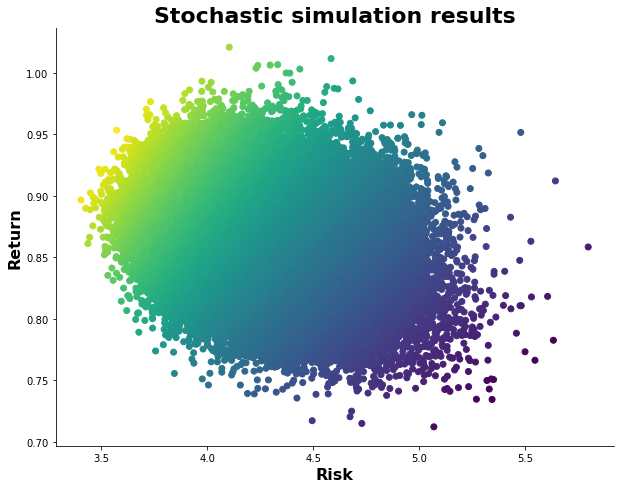

In [33]:
risk_list = []
return_list = []
total_stock = len(df.columns)
stop = 0

while stop < 100000:
    try:
        stop += 1
        weight = np.random.rand(total_stock)
        weight = weight / sum(weight)
        return_list.append(sum(stocks_expected_return * weight))
        risk_list.append(np.sqrt(reduce(np.dot, [weight, covariance_matrix, weight.T])))
    except:
        pass

fig = plt.figure(figsize = (10,8))
fig.subplots_adjust(top=0.85)
ax = fig.add_subplot()

fig.subplots_adjust(top=0.85)
ax0 = ax.scatter(risk_list, return_list,
                c=(np.array(return_list))/np.array(risk_list),
                marker = 'o',label='n=1,000,000')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Stochastic simulation results', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk', fontsize=16, fontweight='bold')
ax.set_ylabel('Return', fontsize=16, fontweight='bold')


### Repeat this entire process by simulating 1/w using the standard uniform distribution: i.e., take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight . Plot your results to show the minimum-variance frontier on a separate graph.

Text(0, 0.5, 'Return')

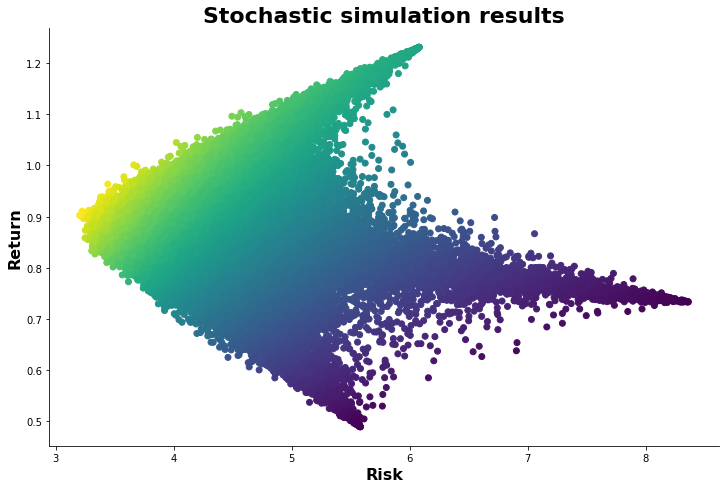

In [34]:
risk_list = []
return_list = []
total_stock = len(df.columns)
stop = 0

while stop < 100000:
    try:
        stop += 1
        weight = np.random.rand(total_stock)
        weight = np.reciprocal(weight)
        weight =weight/sum(weight)
        return_list.append(sum(stocks_expected_return * weight))
        risk_list.append(np.sqrt(reduce(np.dot, [weight, covariance_matrix, weight.T])))
    except:
        pass

fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(top=0.85)
ax = fig.add_subplot()

fig.subplots_adjust(top=0.85)
ax0 = ax.scatter(risk_list, return_list,
                c=(np.array(return_list))/np.array(risk_list),
                marker = 'o',label='n=1,000,000')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Stochastic simulation results', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk', fontsize=16, fontweight='bold')
ax.set_ylabel('Return', fontsize=16, fontweight='bold')


### Abnormal mean return could be due to pricing error (for passive portfolios) or managerial ability (for actively-managed portfolios)